In [44]:
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
from os.path import join
import scipy

In [40]:
def amp2dB (amp):
    return 20 * np.log10(amp)

In [41]:
ds = xa.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/ds-lidar-us4.nc')
ds = ds.drop('spatial_ref')
df = ds.to_dataframe()
df = df.reset_index(level=[0,1])

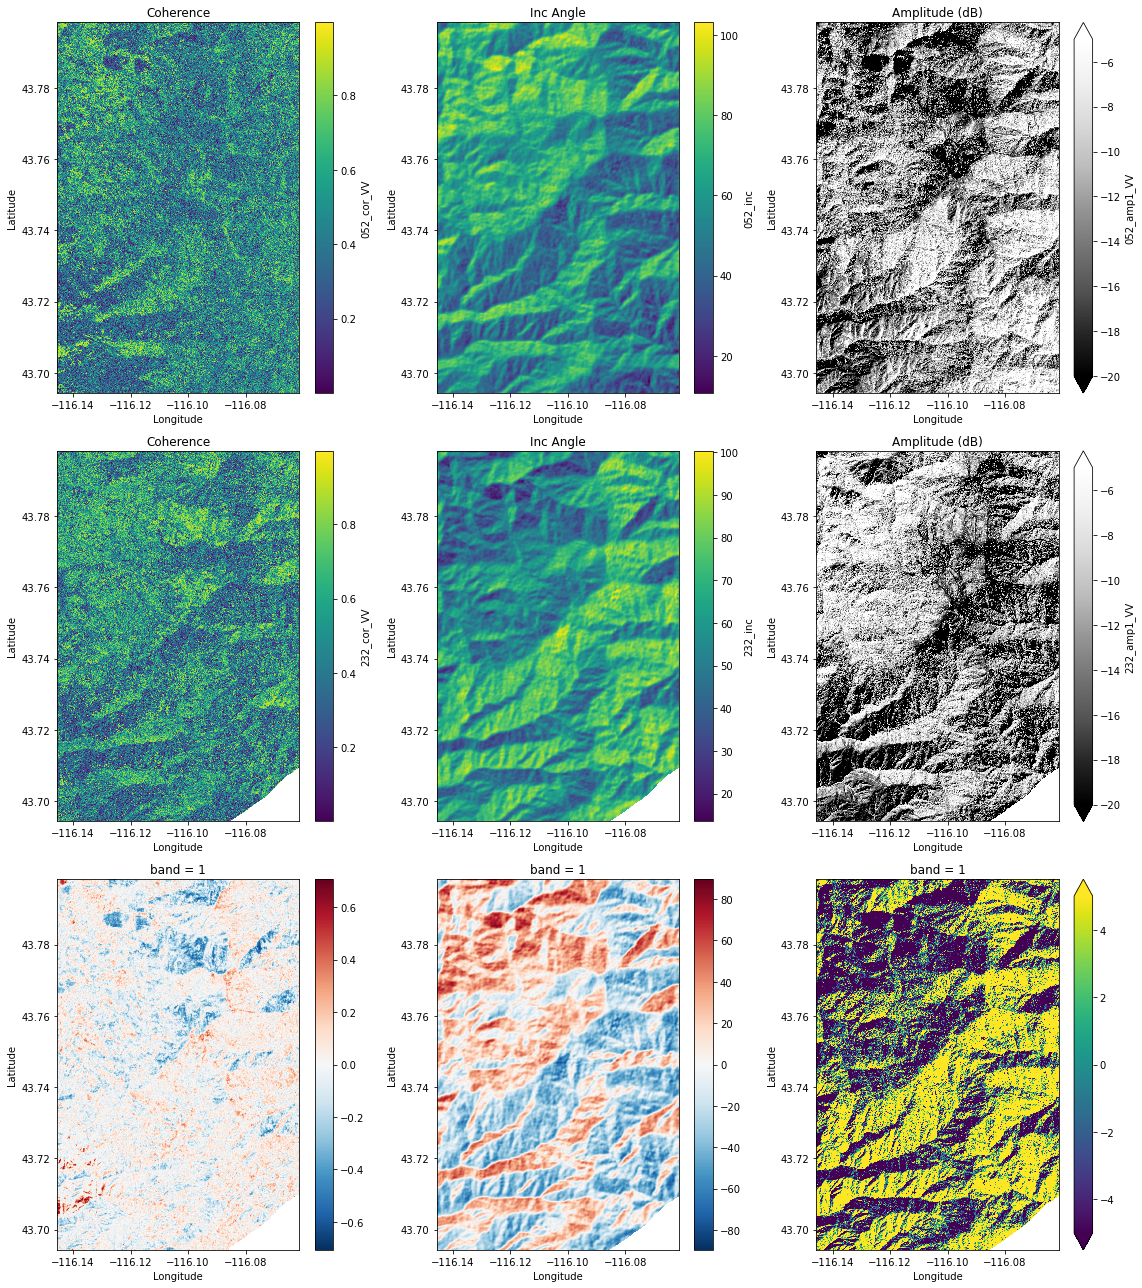

In [65]:
f, axes = plt.subplots(3, 3, figsize = (16, 18))

for i, dir in enumerate(['052', '232']):
    ds[f'{dir}_cor_VV'].plot(ax = axes[i, 0])
    axes[i, 0].set_title('Coherence')
    np.rad2deg(ds[f'{dir}_inc']).plot(ax = axes[i, 1])
    axes[i, 1].set_title('Inc Angle')
    amp2dB(ds[f'{dir}_amp1_VV']).plot(vmax = -5, vmin = -20, cmap = 'Greys_r', ax = axes[i,2])
    axes[i, 2].set_title('Amplitude (dB)')
    for j in range(3):
        ax = axes[i,j]
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

cor_dif_smo = scipy.ndimage.gaussian_filter(ds['052_cor_VV']- ds['232_cor_VV'], 2)
cor_dif_smo = xa.DataArray(cor_dif_smo, coords = ds['052_cor_VV'].coords)
cor_dif_smo.plot(ax = axes[2, 0])
(np.rad2deg(ds['052_inc']) - np.rad2deg(ds['232_inc'])).plot(ax = axes[2, 1])
(amp2dB(ds['052_amp1_VV']) - amp2dB(ds['232_amp1_VV'])).plot(vmax = 5, vmin = -5, ax = axes[2,2])
for j in range(3):
        ax = axes[2,j]
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

plt.tight_layout()

KeyboardInterrupt: 

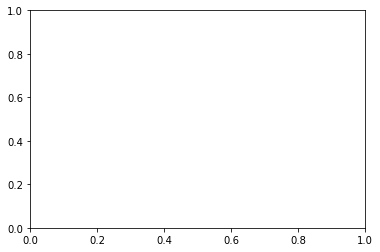

In [57]:
sns.histplot(data = df, y = '232_cor_VV', x = '232_inc') 